# Exploratory Data Analysis on the Titanic Dataset

<hr style="height:1.5px; background-color:black; border:none;">

<h2>Project Goals:</h2>
<div style="background-color:lavenderblush; padding: 10px; border-radius: 5px;">
    <ul>
        <li>Understand survival patterns among Titanic passengers using exploratory data analysis.</li>
        <li>Identify key factors (e.g. gender, class, fare, family size) that influenced survival rates.</li>
        <li>Visualize data insights using Seaborn and Matplotlib for better pattern recognition.</li>
        <li>Clean and preprocess the dataset — handle missing values, explore data types.</li>
        <li>Perform statistical analysis (like correlation) to detect variable relationships.</li>
        <li>Communicate findings clearly through stylish, understandable charts and markdowns.</li>
    </ul>
</div>

<hr style="height:1px; background-color:black; border:none;">

## Step 1: Load Dataset

In [2]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
data = sns.load_dataset("titanic")
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
# save the dataset as csv
data.to_csv("titanic_seaborn", index=False)

<hr style="height:1px; background-color:black; border:none;">

## Context Of The Data

| Column        | Description                                                           |
| ------------- | --------------------------------------------------------------------- |
| `survived`    | 0 = No, 1 = Yes — Did the person survive?                             |
| `pclass`      | Passenger class (1 = First, 2 = Second, 3 = Third) — wealth indicator |
| `sex`         | Gender of the passenger                                               |
| `age`         | Age in years (some missing)                                           |
| `sibsp`       | Number of siblings/spouses aboard                                          |
| `parch`       | Number of parents/children aboard                                          |
| `fare`        | Fare paid for the ticket                                              |
| `embarked`    | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  |
| `class`       | Categorical version of `pclass` (First/Second/Third)                  |
| `who`         | Categorical grouping (man, woman, child)                              |
| `adult_male`  | True/False — is the person an adult male?                             |
| `deck`        | Cabin deck (A–G, some missing)                                        |
| `embark_town` | Town name instead of letter code                                      |
| `alive`       | Same as `survived` but in word form (“yes”/“no”)                      |
| `alone`       | True/False — were they traveling alone?                               |


<hr style="height:0.5px;background-color:black; border:none;">

## Step 2: Data Overview

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<hr style="height:1px; background-color:black; border:none;">

#### Use describe to give quick statistical summary of numeric columns in your DataFrame.
#### It gives you a basic idea of: 
- Distribution
- Range
- Central tendency
- Spread (aka variability)

In [6]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<hr style="height:1px; background-color:black; border:none;">

#### To view all column we use below code

In [7]:
data.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<hr style="height:1px; background-color:black; border:none;">

#### To view specific column types seperately, we can write it like this

In [8]:
data.describe(include=["object","category"])

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


In [9]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<hr style="height:1px; background-color:black; border:none;">

#### Check no of NaNs in each column

In [10]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<hr style="height:1px; background-color:black; border:none;">

#### Analyze the shape

In [11]:
data.shape

(891, 15)

<hr style="height:1px; background-color:black; border:none;">

## Step 3: Data Cleaning

In [12]:
# Drop columns that are not needed
data.drop(columns=['deck'], inplace=True)

In [13]:
# See columns
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [14]:
# # Filling missing values
data["age"] = data["age"].fillna(data["age"].median())

In [15]:
data["embarked"] = data["embarked"].fillna(data["embarked"].mode()[0])
data["embark_town"] = data["embark_town"].fillna(data["embark_town"].mode()[0])

In [16]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

#### Now that we have no null values we can move towards next step

<hr style="height:1px; background-color:black; border:none;">

## Step 4: Basic Stats

In [17]:
# survival count
data["survived"].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [18]:
# gender vs survival
data.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [19]:
# class vs survival
data.groupby("class", observed=True)["survived"].mean()

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

<hr style="height:1px; background-color:black; border:none;">

## Step 5: Visualizations

### 1. Survival Count

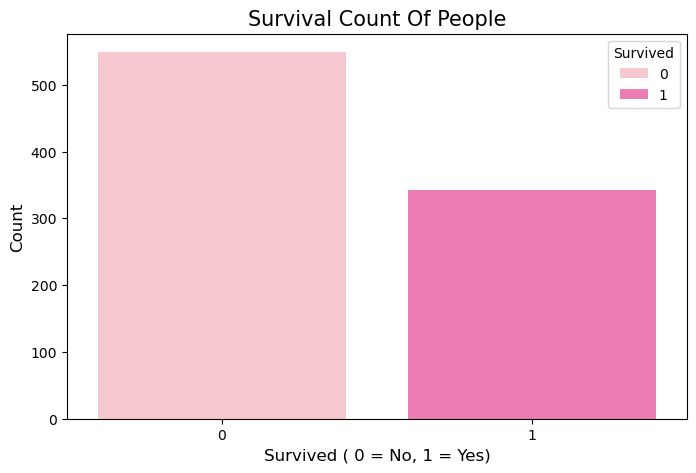

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x = "survived", data = data, hue = "survived", palette = {0:"pink",1:"hotpink"})
plt.title("Survival Count Of People", fontsize = 15)
plt.xlabel("Survived ( 0 = No, 1 = Yes)", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.legend(title = "Survived")
plt.show()

In [21]:
data["survived"].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

#### Explanation:
- Above countchart is simple "Survival Count Of People".
- We can clearly see more than 50% of people died.
- __Note__ : RIP Good People on The Ship. 🕊️

<hr style="height:1px; background-color:black; border:none;">

### 2. Survival Count By Gender

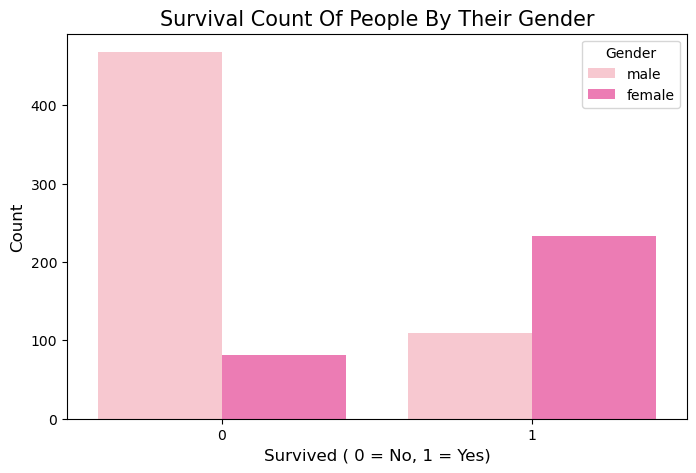

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x = "survived", data = data, hue = "sex", palette ={"male":"pink","female":"hotpink"})
plt.title("Survival Count Of People By Their Gender", fontsize = 15)
plt.xlabel("Survived ( 0 = No, 1 = Yes)", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.legend(title = "Gender")
plt.show()

In [23]:
data.groupby("sex")["survived"].value_counts()

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

#### Explanation:
- This chart breaks survival down by gender.
- We can clearly see that women had a significantly higher survival rate than men.
- Note: This is just a statistical observation — no personal bias intended. 😇

<hr style="height:1px; background-color:black; border:none;">

### 3. Survival Count By Class

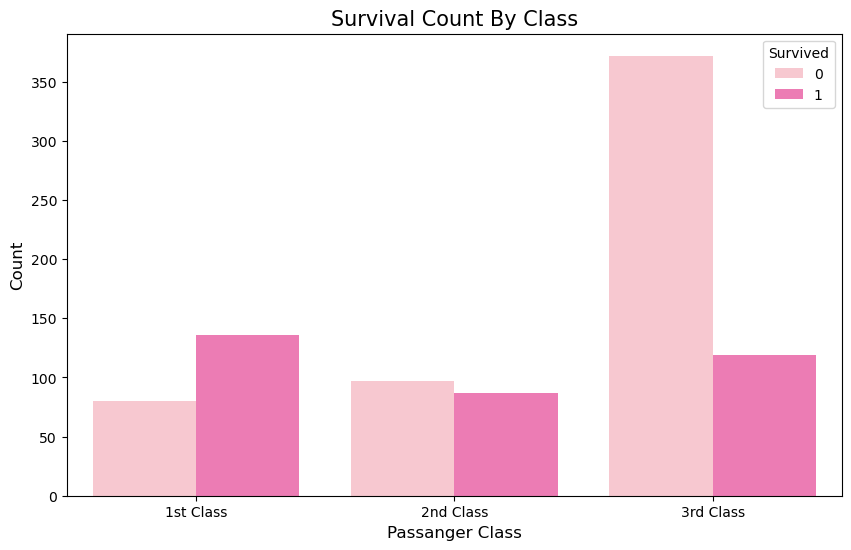

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x = "pclass", data = data, hue = "survived", palette = {0:"pink",1:"hotpink"})
plt.title("Survival Count By Class", fontsize = 15)
plt.xlabel("Passanger Class", fontsize = 12)
plt.xticks(ticks=[0,1,2], labels=["1st Class", "2nd Class", "3rd Class"])
plt.ylabel("Count", fontsize = 12)
plt.legend(title = "Survived")
plt.show()

In [25]:
data.groupby("pclass")["survived"].value_counts()

pclass  survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

#### Explaination:
- This is another survival count chart — but this time based on passenger class.
- It’s an easy one to read: people from higher classes had a significantly higher survival rate compared to those in third class.
- In first class, the majority survived.
- In second class, survival and non-survival rates are nearly equal, but slightly more people didn’t make it.
- And in third class? Pure chaos 😩 — the gap between survival and death is massive.
- __Overall takeaway:__ If you were rich on the Titanic (or had a first class ticket), you were far more likely to survive.

<hr style="height:1px; background-color:black; border:none;">

### 4. Age Distribution Across Class

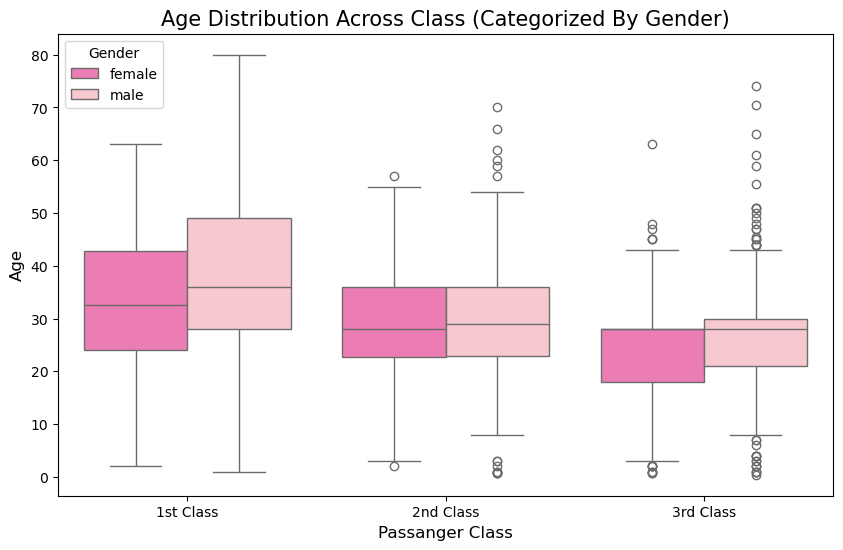

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "pclass", y = "age", data = data, hue = "sex", palette = {"male":"pink","female":"hotpink"})
plt.title("Age Distribution Across Class (Categorized By Gender)", fontsize = 15)
plt.xlabel("Passanger Class", fontsize = 12)
plt.xticks(ticks=[0,1,2], labels=["1st Class", "2nd Class", "3rd Class"])
plt.ylabel("Age", fontsize = 12)
plt.legend(title="Gender")
plt.show()

In [27]:
data.groupby("pclass")["age"].mean()

pclass
1    36.812130
2    29.765380
3    25.932627
Name: age, dtype: float64

#### Explaination:
- This is a simple boxplot analyzing the age distribution across different passenger classes.
- In 1st class, most passengers were between their early 20s to late 50s — giving rich uncle vibes™ all over 🥂.
- Interestingly, no children or very elderly people were in first class. (They had sense, clearly.)
- In 2nd class, most passengers were in their 20s to late 40s — a mature crowd. But we can see some outliers, mostly children, especially male children.
- In 3rd class, the majority were in their early 20s to late 30s — aka the young youth energy.
- But this class had a lot more outliers, especially male babies and older males — showing a wide range of people packed in here.

<hr style="height:1px; background-color:black; border:none;">

### 5. Count Of People Based On Three Categories (Man, Woman, Child)

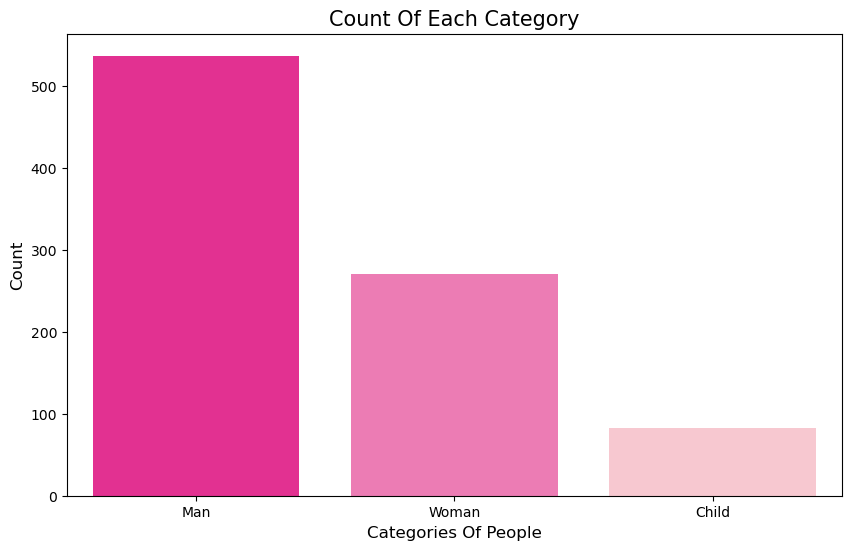

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(x = "who", data = data, hue = "who", palette = {"man":"deeppink", "woman":"hotpink", "child":"pink"})
plt.title("Count Of Each Category", fontsize = 15)
plt.xlabel("Categories Of People", fontsize = 12)
plt.xticks(ticks = ['man','woman','child'], labels = ['Man','Woman','Child'])
plt.ylabel("Count", fontsize = 12)
plt.show()

#### Explanation:
- A simple countplot showing three categories: Man, Woman, and Child.
- We can clearly see that there were a lot of men on the ship.
- The number of women was about half of that, and children were even fewer compared to both.

<hr style="height:1px; background-color:black; border:none;">

### 6. Count Of People Based On Three Categories (Man, Woman, Child) And Their Survival Rate

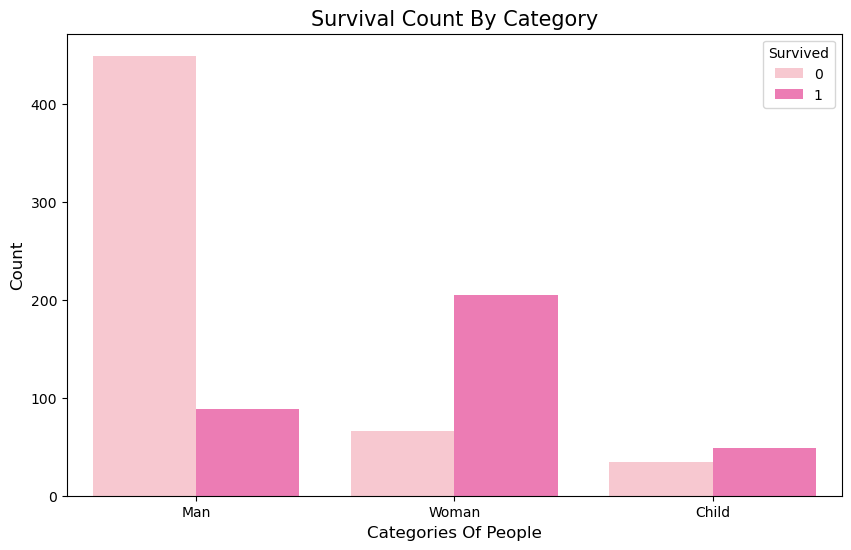

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x = "who", data = data, hue = "survived", palette = {0:"pink", 1:"hotpink"})
plt.title("Survival Count By Category", fontsize = 15)
plt.xlabel("Categories Of People", fontsize = 12)
plt.xticks(ticks = ['man','woman','child'], labels = ['Man','Woman','Child'])
plt.ylabel("Count", fontsize = 12)
plt.legend(title="Survived")
plt.show()

#### Explanation:
- Again, a simple countplot for Man, Woman, and Child, but this time showing survival count.
- We can see that very few men survived (yikes).
- Oh la la ~ the survival count of women? Chef’s kiss. 👩‍🍳💅
- More children survived too — but sadly, many didn’t make it.
- __Observation:__ If you were a woman on the Titanic, your chances of survival were significantly higher. Being a man? Good luck, bro. 😶

#### It wasn’t women and children first... it was women and some children, and men were just... decor. ☠️

<hr style="height:1px; background-color:black; border:none;">

### 7. Age Distribution Of People.

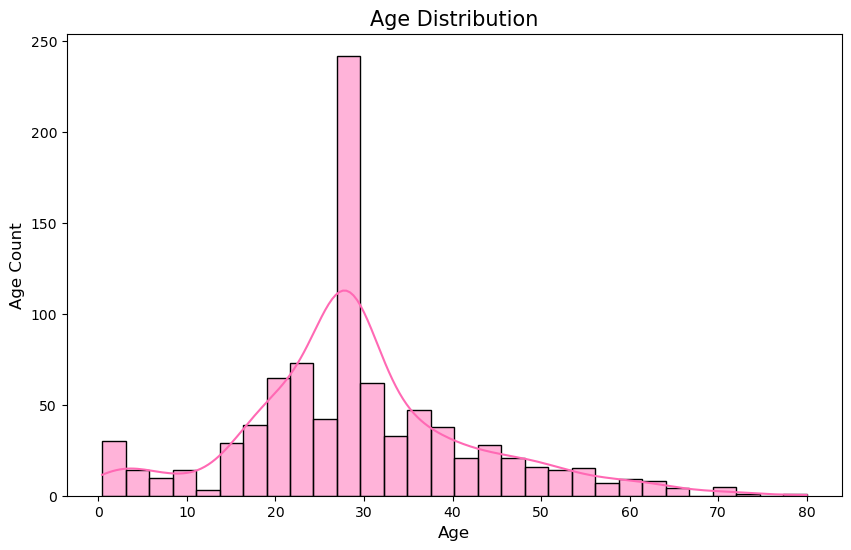

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(data["age"], kde=True, bins=30, color="hotpink")
plt.title("Age Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 12)
plt.ylabel("Age Count", fontsize = 12)
plt.show()

#### Explaination:
- It's a simple histogram shows age distribution.
- We can see a high bar on late 20s, so majority of people were from late 20s which is a good age to travel.

<hr style="height:1px; background-color:black; border:none;">

### 8. Fare Distribution

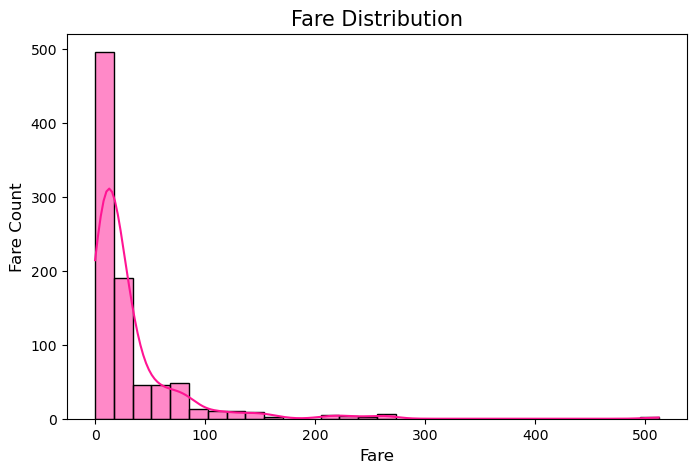

In [38]:
plt.figure(figsize=(8,5))
sns.histplot(data["fare"], kde=True, bins=30, color="deeppink")
plt.title("Fare Distribution", fontsize = 15)
plt.xlabel("Fare", fontsize = 12)
plt.ylabel("Fare Count", fontsize = 12)
plt.show()

#### Explanation:
- This histogram is telling us how much people paid for their Titanic ticket (aka how much you had to spend for that iceberg ride 💸❄️).
- Most of the fares are super low — like almost all the crowd paid under 50 Dollars, and that one lonely rich person out there paid $500 for a room with a better view of their doom. ☠️
- You can literally see the spike near the start = budget passengers popping off.
- __Moral:__ Being rich didn’t mean you got a better deal, just a prettier goodbye

<hr style="height:1px; background-color:black; border:none;">

### 9. Correlation Heatmap

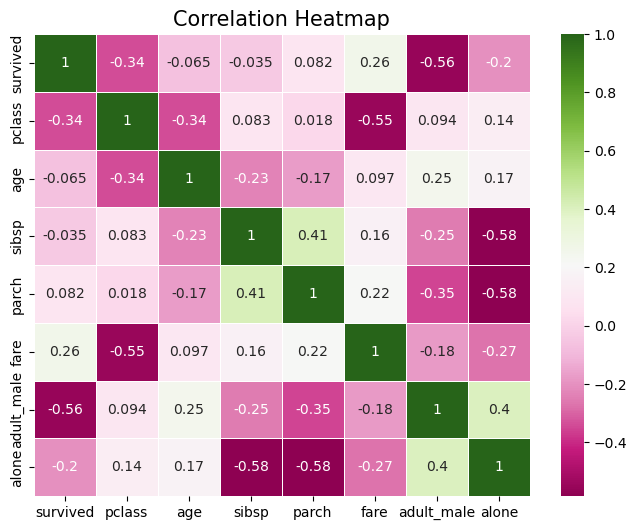

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="PiYG", linewidth=0.5)
plt.title("Correlation Heatmap", fontsize=15)
plt.show()

#### Explanation:
- This is the gossip chart 🫣 — telling us who’s secretly linked with who.
- Like adult_male and survived are not friends at all (-0.56 brooo they’re beefing hard).
- Fare and pclass are on opposite vibes too (the richer you are, lower the class number, duh).
- SibSp and Parch — they’re family-coded obviously, like same bloodline.
- Nothing is 100% connected to survival, but small hints are peeking through the pink.

<hr style="height:1px; background-color:black; border:none;">

### 10. Survival vs Family Variables

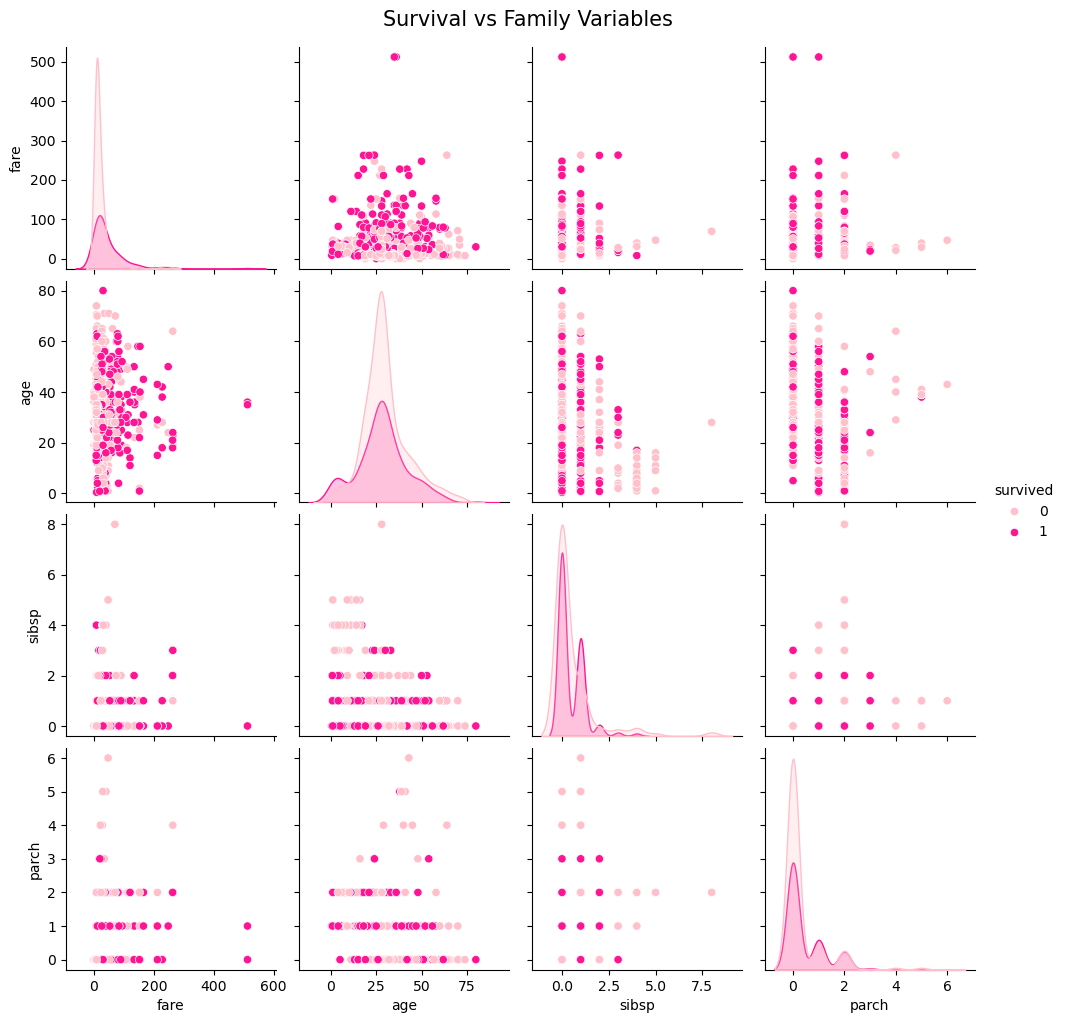

In [45]:
sns.pairplot(data[["fare", "age", "sibsp", "parch", "survived"]], hue="survived", palette={0: "pink", 1: "deeppink"})
plt.suptitle("Survival vs Family Variables", y=1.02, fontsize = 15)
plt.show()

#### Explanation:
- It’s like a cute group date of 4 variables: Fare, Age, SibSp, and Parch with Survival as the drama queen.
- Hotpink = survived | Light pink = didn’t make it 😢
- You’ll see that people who paid higher fares had higher chances of survival.
- Younger folks also kinda did better (but not always).
- Having too many siblings/parents was low-key chaotic for survival chances.
- Basically this chart is “more money, less chaos = more chance of living”

<hr style="height:1px; background-color:black; border:none;">

### 11. Family Size vs Survival

In [41]:
# Create new column
data["family_size"] = data["sibsp"] + data["parch"]

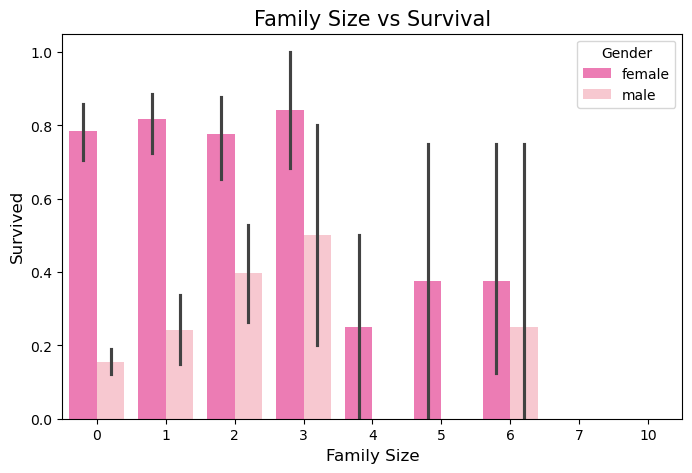

In [42]:
# Visualize family size impact
plt.figure(figsize=(8,5))
sns.barplot(x="family_size", y="survived", hue="sex", data=data, palette={"male":"pink","female":"hotpink"})
plt.title("Family Size vs Survival", fontsize = 15)
plt.xlabel("Family Size", fontsize=12)
plt.ylabel("Survived", fontsize=12)
plt.legend(title="Gender")
plt.show()

#### Explanation:
- This is the ultimate “Did you survive or did your family drag you down?” chart.
- People with no family (fam size 0) — solo travelers — had decent survival (especially women 💗 slay queens).
- Sweet spot = family size 2–3. Like enough to not be lonely but not enough to trip over them on the lifeboat.
- Past that? Survival rate goes downhill real fast — chaos increases, Titanic said “nope.” 
- Also again, being a woman literally boosted survival in every category

---

#### Saving The Clean Version Of Data As Excel

In [55]:
data.to_excel("titanic_cleaned_final_version_for_people_who_don't_code.xlsx", index=False)

<hr style="height:1px; background-color:black; border:none;">

<h2>Step 6: Conclusion: What Actually Went Down on the Titanic?</h2>
<div style="background-color:lavenderblush; padding: 10px; border-radius: 5px;">
    <h4>After analyzing the Titanic dataset with my detective glasses on 🕵️‍♀️, here’s what I found — loud, clear, and kinda sad:</h4>
    <ul>
        <li>Over 50% of passengers didn’t survive. That iceberg was NOT playing. Survival wasn’t just about fate — it was deeply tied to gender, class, and family dynamics.</li>
        <li>Being a woman or a child literally saved lives. Men? Sorry bros, most of y’all didn’t make it (don’t shoot the messenger).</li>
        <li>First-class passengers had better survival rates — the ship went down, but social class still floated 🤷‍♀️💸.</li>
        <li>Traveling alone wasn’t always bad — solo travelers, especially women, had a high survival rate. But if you were traveling with a whole squad of 6+, let’s just say chaos did not help your odds. Titanic = not a family vacation ship.</li>
        <li>Money did buy safety — people who paid higher fares had better odds. That’s capitalism for you, even on sinking ships.</li>
        <li>Most people were young — 20s to 30s dominated. So basically the youth got hit hardest, especially in lower classes.</li>
        <li>Also shoutout to deck info missing — like hello Titanic record-keepers? Half the data gone. (You had one job.)</li>  
    </ul>
</div>

<hr style="height:1px; background-color:black; border:none;">

<h3>Final Thoughts:</h3> 
<div style="background-color:lavenderblush; padding: 10px; border-radius: 5px;">
    This wasn’t just a shipwreck, it was a whole social experiment in disaster. The data proves that when tragedy hits, your wealth, gender, and who you're with might decide your fate. Harsh but true.
    And yeah... if you were rich, a woman, and traveling light? You had the ✨ Titanic Survival Starter Pack ✨.
</div>

<hr style="height:2px; background-color:black; border:none;">

## Author
### Nitisha 💗